# Group Study Reinforcement Learning

## Multi-Armed Bandits - A single state example


* Given N different arms to choose from, each with an unknown reward, what strategy should we use to explore and learn the values of each arm, while exploiting our current knowledge to maximize profit?
* This is a very common approach for optimizing online marketing campaigns.
* This can be thought of as a single-state reinforcement learning problem


# Exploration vs Exploitation

- In the absence of a Supervisor, the agent must exlore the environment in order to gain information about rewards, while exploiting it's current information to maximize it's rewards.

- Balancing this tradeoff is a common theme

## Epsilon-greedy

- A fraction (1 - $\epsilon$) of the time, choose the arm with the largest estimated value (exploit)
- The other $\epsilon$ of the time, chose a random arm (explore)
- Tune $\epsilon$ in order to balance tradeoff



In [80]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

- Let true arm values be normally distributed with mean of 0, variance of 1
- Add a noise term to each reward, also normally distributed with mean of 0, variance of 1

## Bandit class

In [81]:
class Bandit:
    '''
    class to represent a n - armed slot machine
    each arm has value, no of times a particular arm was pulled, and its running average of reward
    '''
    def __init__(self):
        self.arm_values = np.random.normal(0,1,10) #10 random sample values from gaussian distribution
        self.K = np.zeros(10) # K = stores no of times the arm is pulled 
        self.est_values = np.zeros(10) #running avg of the reward
   
    
    def get_reward(self,action):
        noise = np.random.normal(0,1)
        if noise < self.arm_values[action]: #if arm value greater than random value, we get reward = 1
            reward = 1
        else:
            reward = 0
        return reward
    
    #action search strategy 2
    def choose_eps_greedy(self,epsilon):
        '''e greedy action search method
           if e = 0 => greedy(exploit the best arm),e =1 =>random(select any arm), for other values of e => e-greedy
           returns the arm index of the arm to be pulled 
        '''
        rand_num = np.random.random()
        if epsilon>rand_num: #explore
            return np.random.randint(10)
        else: #exploit
            return np.argmax(self.est_values)


    #action search strategy 2 => Needs to be worked on
    def softmax(self):
        '''actionsearch strategy using botlzmann approach
           returns the arm index of the arm to be pulled 
        '''
        tau = 1.12 #some random tau value
        weighted_probs = np.zeros(10)
        #calculate the weighted probability of each arm
        for i in range(10):
            softm = ( np.exp(self.est_values[i] / tau) / np.sum( np.exp(self.est_values[:] / tau) ) )
            weighted_probs[i] = softm

        return np.random.choice(range(10), p=weighted_probs)


    def update_est(self,action,reward):
        '''
        updates the K(i.e count of arm # pulled) and running avg of the arm(action)selected 
        '''
        self.K[action] += 1 #update the count
        alpha = 1./self.K[action] 
        #update the running average of rewards
        self.est_values[action] += alpha * (reward - self.est_values[action])  # keeps running average of rewards

## Lets get some money

In [82]:
bandit = Bandit()

In [83]:
print ("arm values => " + str(bandit.arm_values))
print ("K => " + str(bandit.K))
print("est_values => " + str(bandit.est_values))

arm values => [ 1.50608695  0.63910542  0.45152935 -1.234298   -0.13605638  0.85195221
 -0.8470587  -0.0870578  -0.0220476  -0.22923694]
K => [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
est_values => [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [84]:
selected_arm = bandit.choose_eps_greedy(0.3) #eps = 0.3
print(selected_arm)

4


In [85]:
reward = bandit.get_reward(selected_arm)
print(reward)

0


### updated arm values after 1 pull

In [86]:

bandit.update_est(selected_arm, reward)
print ("arm values => " + str(bandit.arm_values))
print ("K => " + str(bandit.K))
print("est_values => " + str(bandit.est_values))

arm values => [ 1.50608695  0.63910542  0.45152935 -1.234298   -0.13605638  0.85195221
 -0.8470587  -0.0870578  -0.0220476  -0.22923694]
K => [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
est_values => [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


### Lets try our luck again

In [87]:
#lets pull the arm again and see its values

selected_arm = bandit.choose_eps_greedy(0.3)
print("selected arm => " +str(selected_arm))
reward = bandit.get_reward(selected_arm)
print("reward => " +str(reward))
bandit.update_est(selected_arm,reward)
print ("arm values => " + str(bandit.arm_values))
print ("K => " + str(bandit.K))
print("est_values => " + str(bandit.est_values))

selected arm => 8
reward => 0
arm values => [ 1.50608695  0.63910542  0.45152935 -1.234298   -0.13605638  0.85195221
 -0.8470587  -0.0870578  -0.0220476  -0.22923694]
K => [ 0.  0.  0.  0.  1.  0.  0.  0.  1.  0.]
est_values => [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


# Experiment
A single experiment consists of pulling the arm Npulls times for a given 10 armed bandit.

## Epsilon greedy experiment

In [88]:
#epsilon greedy experiment

def experiment(bandit,Npulls,epsilon):
    '''
    Multi armed bandit experiment conducted using e-greedy search method
    '''
    #store the reward history during the conducted experiment
    history = []
    
    for i in range(Npulls):
        #step 1 : select action i.e arm #
        action = bandit.choose_eps_greedy(epsilon)
        #step 2 : calculate the reward for selecting that arm#
        R = bandit.get_reward(action)
        #step 3 : update the reward value of the arm selected 
        bandit.update_est(action,R)
        history.append(R)
        
    return np.array(history)

## Boltzmann experiment

In [89]:
#boltzmann experiment

def experiment2(bandit,Npulls):
    '''
    Multi armed bandit experiment conducted using boltzmann approach search method
    '''
    #store the reward history during the conducted experiment
    history = []
    for i in range(Npulls):
        #step 1 : select action i.e arm #
        action = bandit.softmax()
        #step 2 : calculate the reward for selecting that arm#
        R = bandit.get_reward(action)
        #step 3 : update the reward value of the arm selected 
        bandit.update_est(action,R)
        history.append(R)

    return np.array(history)

Repeat experiment many times and look at the evolution of the rewards, averaged over all the experiments

## Let's use our RL experiments to play slots

In [90]:

#Nexp gives the number of times we need to experiment
Nexp = 120
#each experiment consists of Npulls number of arms pulled
Npulls = 500

#variables to store avg reward of a particular experiment
avg_outcome_eps0p0 = np.zeros(Npulls) # greedy selection experiment
avg_outcome_eps0p1 = np.zeros(Npulls) # e - greedy experiment
avg_outcome_eps1 = np.zeros(Npulls) # random selection experiment
avg_outcome_boltzmann = np.zeros(Npulls)

avg_outcome_changinge = np.zeros(Npulls) # changing e selection experiment 


for i in range(Nexp):
    bandit = Bandit()
    avg_outcome_eps0p0 += experiment(bandit,Npulls,0.0)
    
    bandit = Bandit()
    avg_outcome_eps0p1 += experiment(bandit,Npulls,0.1)
    
    bandit = Bandit()
    avg_outcome_eps1 += experiment(bandit,Npulls,0.1)
    
    bandit = Bandit()
    avg_outcome_boltzmann += experiment2(bandit,Npulls)

bandit = Bandit()
for i in range(int(Nexp/4)):
    avg_outcome_changinge += experiment(bandit, Npulls, 0.20) #explore more
    
for i in range(int(Nexp/4)):
    avg_outcome_changinge += experiment(bandit, Npulls, 0.12)    

    
for i in range(int(Nexp/2)):
    avg_outcome_changinge += experiment(bandit, Npulls, 0.08) #exploit more


avg_outcome_eps0p0 /= np.float(Nexp)
avg_outcome_eps0p1 /= np.float(Nexp)
avg_outcome_eps1 /= np.float(Nexp)
avg_outcome_boltzmann /= np.float(Nexp)
avg_outcome_changinge /= np.float(Nexp)

## Plots

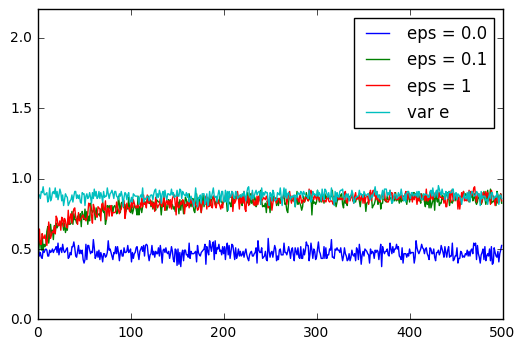

In [91]:
plt.plot(avg_outcome_eps0p0,label="eps = 0.0")
plt.plot(avg_outcome_eps0p1,label="eps = 0.1")
plt.plot(avg_outcome_eps1,label="eps = 1")
#plt.plot(avg_outcome_boltzmann,label="eps = boltzmn")
plt.plot(avg_outcome_changinge, label = "var e")


plt.ylim(0,2.2)
plt.legend()
plt.show()

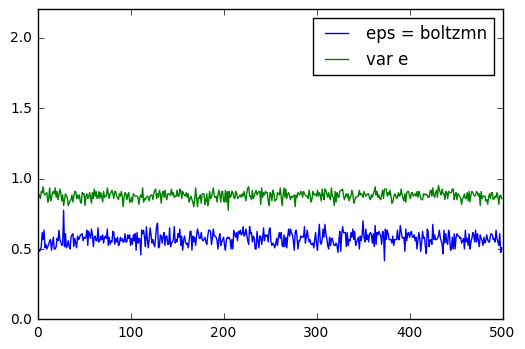

In [92]:
plt.plot(avg_outcome_boltzmann,label="eps = boltzmn")
plt.plot(avg_outcome_changinge, label = "var e")


plt.ylim(0,2.2)
plt.legend()
plt.show()